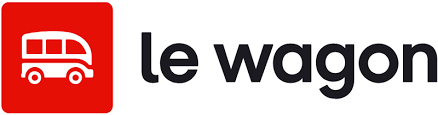


Vous travaillez dans l'équipe data de GreenThumb. Votre mission est d'explorer les données de l'entreprise et de développer un modèle de Deep Learning pour analyser les sentiments des reviews.

Consignes :
- Répondez aux questions : Remplissez les cellules de code ou de texte lorsque vous voyez *Répondez ici*.

- Focus sur les [reviews](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv) : Concentrez-vous sur l'analyse de sentiment des reviews.

- Utilisez le Deep Learning : Développez des modèles de Deep Learning.

- Priorité à l'apprentissage correct : Le temps est limité, l'objectif est d'avoir des modèles qui apprennent correctement, pas nécessairement les plus performants.

# Exploration de la donnée

Nous allons nous concentrer sur le **[reviews_df](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv)**.

Exectuez la cellule ci-dessous pour récupérer la donnée.

In [1]:
import pandas as pd

reviews_df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv")

1 / Supprimez toutes les lignes avec des valeurs manquantes et toutes les lignes en double.

In [2]:
# SUPPRIMER LES VALEURS MANQUANTES
reviews_df.dropna(inplace=True)
# supprimer les doublons
reviews_df.drop_duplicates(inplace=True)


2 / Utilisez la librairie de votre choix pour créer un graphique montrant la répartition des **ReviewScore**.

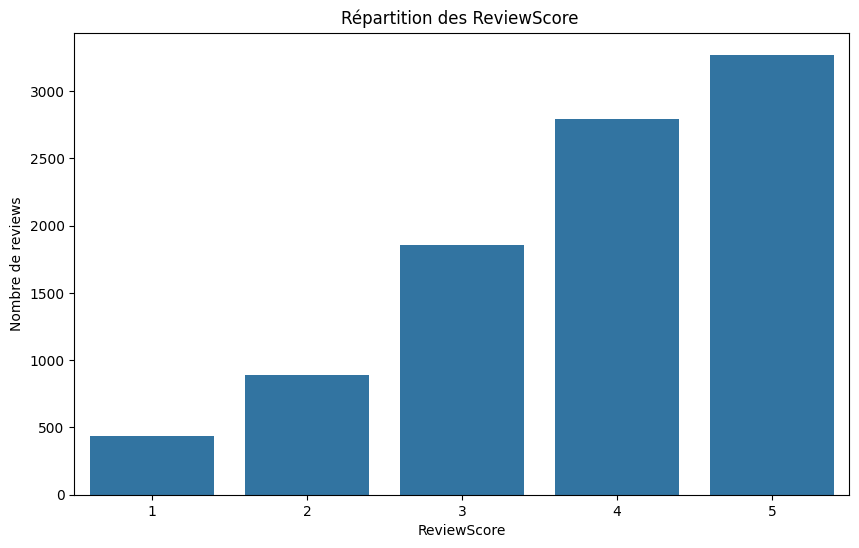

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du graphique
plt.figure(figsize=(10, 6))  # Définit la taille du graphique
sns.countplot(x='ReviewScore', data=reviews_df)

plt.title('Répartition des ReviewScore ')
plt.xlabel('ReviewScore')
plt.ylabel('Nombre de reviews')

plt.show()

# Préparation de la donnée

3 / Créez votre feature X comprenant la colonne **ReviewText** et votre y comprenant la colonne **ReviewScore**.

In [4]:
X = reviews_df['ReviewText'] 
y = reviews_df['ReviewScore'] 

y.tail(3)

484950    4
485041    5
485050    3
Name: ReviewScore, dtype: int64

4 / Transformez la target en utilisant les correspondances suivantes :
- 1 => 0
- 2 => 0
- 3 => 0
- 4 => 1
- 5 => 1

In [5]:
y= y.replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})
y.tail(3)

484950    1
485041    1
485050    0
Name: ReviewScore, dtype: int64

5 / Utilisez la méthode de hold-out pour ne garder que 20% de la donnée pour le test.

In [6]:
from sklearn.model_selection import train_test_split
# 80% train - 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6 / Appliquez sur le X_train toutes les méthodes de transformations de la donnée que vous connaissez et qui vous paraissent pertinentes.

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('wordnet')

def text_processing(text):
     #Charger les stop-words en anglais
    stop_words = set(stopwords.words('english'))
    # Initialiser le lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Appliquer la tokenisation à tous les textes
    tokens = word_tokenize(text.lower())
    # Supprimer les ponctuations
    tokens = [word for word in tokens if word not in string.punctuation]
    # Supprimer les stop-words
    tokens = [word for word in tokens if word not in stop_words]
    # Appliquer la lemmatisation à tous les tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = ' '.join(tokens)
    return tokens

print(X_train.head(3))
X_train = X_train.apply(text_processing)
#afficher les premières lignes pour vérifier
print()
print(X_train.head(3))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cheri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cheri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


432716    Pleased With vera their Care. plants, Easy Ben...
279725          Product Performs Well For its Intended use.
360369    Couldn't be happier with of or natural collect...
Name: ReviewText, dtype: object

432716    pleased vera care plant easy benefit aloe know...
279725                   product performs well intended use
360369    could n't happier natural collection vine scre...
Name: ReviewText, dtype: object


7 / Appliquez sur le X_test les mêmes transformations en les ajustant si nécessaire.

In [8]:
print(X_test.head(3))
X_test = X_test.apply(text_processing)
#afficher les premières lignes pour vérifier
print()
print(X_test.head(3))


331459           item arrived on time and as described.
303752    MEETS THE REQUIREMENTS, NO COMPLAINTS SO FAR.
407891          Amazing Product, Goes Above And beyond.
Name: ReviewText, dtype: object

331459       item arrived time described
303752    meet requirement complaint far
407891         amazing product go beyond
Name: ReviewText, dtype: object


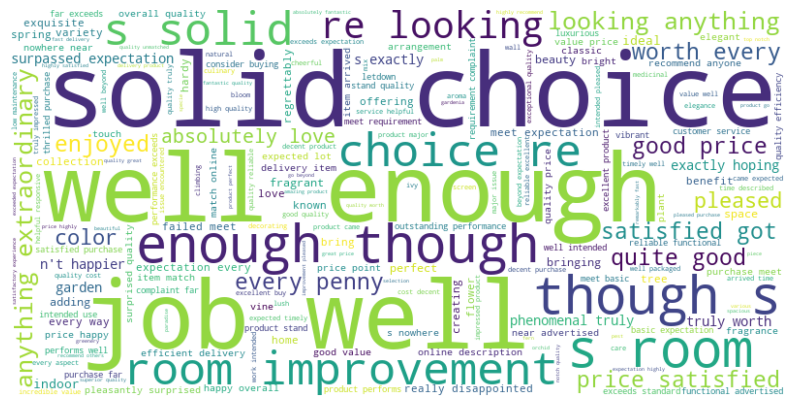

In [11]:
# voir s'il y a des ajustements nécessaires (stopwords a supprimer en plus.etc)
from wordcloud import WordCloud

# Word Cloud pour explorer X_test_processed
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(X_test))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#globalement c'est des mot d'avis donc globalement c'est acceptable.

# Baseline

8 / Vous voulez prédire la note à partir du commentaire.

- Quel type de tâche est-ce ?

- Quelle métrique est appropriée pour ce type de tâche et pourquoi ?

C'est une tache de type régression car la variable cible (la note attribuée à un commentaire) est continue et on cherche à prédire une valeur numérique spécifique plutôt que de classifier dans des catégories discrètes.

Pour la métrique,  MAE est adapté car donne une idée directe de la taille moyenne des erreurs de prédiction en termes de notes ou bien RMSE aussi 

9 / Calculez un score de baseline.

In [12]:
#"MAE"
from sklearn.metrics import mean_absolute_error

#la note moyenne de l'ensemble d'entraînement (baseline)
baseline_prediction = y_train.mean()
y_pred_baseline = pd.Series([baseline_prediction] * len(y_test))
maebaseline = mean_absolute_error(y_test, y_pred_baseline)
print(maebaseline) # erreur absolue moyenne de 0.4519.


0.45196994723225115


# Votre architecture de RNN

Executez le code ci-dessous pour tokenizer et padder la donnée.

In [13]:
X_train.head(3)

432716    pleased vera care plant easy benefit aloe know...
279725                   product performs well intended use
360369    could n't happier natural collection vine scre...
Name: ReviewText, dtype: object

In [14]:
# transformer de series en dataframes
X_train = X_train.to_frame()
X_test = X_test.to_frame()


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_mock_up_data(X_train, X_test):

    ### Let's tokenize the vocabulary
    tk = Tokenizer()
    tk.fit_on_texts(X_train['ReviewText'].tolist())
    vocab_size = len(tk.word_index)
    print(f'There are {vocab_size} different words in your corpus')
    X_train_token = tk.texts_to_sequences(X_train['ReviewText'])
    X_test_token = tk.texts_to_sequences(X_test['ReviewText'])

    ### Pad the inputs
    X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='pre')
    X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='pre')

    return X_train_pad, X_test_pad, vocab_size

X_train_pad, X_test_pad, vocab_size = get_mock_up_data(X_train, X_test)
print("X_pad.shape", X_train_pad.shape), print("Vocab size = ", vocab_size)

There are 314 different words in your corpus
X_pad.shape (7396, 19)
Vocab size =  314


(None, None)

10 / Créez une architecture de RNN pour accomplir cette tâche et entraînez le modèle. Veillez à prendre des mesures pour éviter l'overfitting.

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Définition du modèle RNN
def create_rnn_model(vocab_size, max_seq_length):
    model = Sequential([
        Embedding(vocab_size + 1, 128, input_length=max_seq_length),
        LSTM(64, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Création du modèle
model = create_rnn_model(vocab_size, X_train_pad.shape[1])

#compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# mesure de callback pour eviter l'overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# entrainement
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])



c:\Users\cheri\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6742 - loss: 0.5744 - precision: 0.6796 - recall: 0.9484 - val_accuracy: 0.7520 - val_loss: 0.3921 - val_precision: 0.7984 - val_recall: 0.8367
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7777 - loss: 0.3595 - precision: 0.7953 - recall: 0.8849 - val_accuracy: 0.7872 - val_loss: 0.3582 - val_precision: 0.7914 - val_recall: 0.9214
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7839 - loss: 0.3506 - precision: 0.7835 - recall: 0.9178 - val_accuracy: 0.7899 - val_loss: 0.3609 - val_precision: 0.7781 - val_recall: 0.9551
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8017 - loss: 0.3368 - precision: 0.7915 - recall: 0.9498 - val_accuracy: 0.7905 - val_loss: 0.3585 - val_precision: 0.7878 - val_recall: 0.9357
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7908 - loss: 0.3387 - precision: 0.7822 - recall: 0.9413 - val_accuracy: 0.7953 - val_loss: 0.3577 

11 / Évaluez votre modèle de RNN sur les données de X_test et enregistrez la métrique dans RNN_metric.

In [17]:
# evaluer le modele
loss, accuracy, precision, recall = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

# Calculer le F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Test F1 Score: {f1_score:.4f}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7940 - loss: 0.3434 - precision: 0.7746 - recall: 0.9703
Test Accuracy: 0.7973
Test Precision: 0.7701
Test Recall: 0.9835
Test F1 Score: 0.8638


In [18]:
from sklearn.metrics import classification_report
# Prédire les étiquettes pour le jeu de test
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

RNN_metric = classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])
print(RNN_metric)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

     class 0       0.93      0.45      0.60       641
     class 1       0.77      0.98      0.86      1209

    accuracy                           0.80      1850
   macro avg       0.85      0.71      0.73      1850
weighted avg       0.83      0.80      0.77      1850



Le modèle a une bonne performance globale avec une accuracy de 80%.

Il performe bien pour la classe 1 (recall élevé et F1-score élevé), mais moins bien pour la classe 0 (recall faible).

Laccuracy est élevée pour la classe 0 et le recall élevé pour la classe 1 suggèrent que le modèle est plus fiable pour détecter les exemples de la classe 1 soit les notes >= 4. 
Ceci est peut etre du a un nombre plus important de notes positives (4 et 5) que de mauvaises notes dans le jeu de données.

In [20]:
mae_rnn = mean_absolute_error(y_test, y_pred)
print(f"Model RNN MAE: {mae_rnn:.4f}") # bat la baseline

Model RNN MAE: 0.2027


# Votre architecture de CNN

12 / Créez une architecture de CNN adaptée au texte pour accomplir cette tâche et entraînez le modèle. Veillez à prendre des mesures pour éviter l'overfitting.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# modèle CNN
def create_cnn_model(vocab_size, max_seq_length):
    model = Sequential([
        Embedding(input_dim=vocab_size + 1, output_dim=128, input_length=max_seq_length),
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Créer le modèle
model = create_cnn_model(vocab_size, X_train_pad.shape[1])

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Callback pour éviter l'overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entraîner le modèle
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Évaluer le modèle
loss, accuracy, precision, recall = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

# Calculer le F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Test F1 Score: {f1_score:.4f}")


Epoch 1/20


c:\Users\cheri\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6791 - loss: 0.5637 - precision_1: 0.6874 - recall_1: 0.9464 - val_accuracy: 0.7405 - val_loss: 0.3834 - val_precision_1: 0.8289 - val_recall_1: 0.7663
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7906 - loss: 0.3471 - precision_1: 0.8097 - recall_1: 0.8868 - val_accuracy: 0.7764 - val_loss: 0.3647 - val_precision_1: 0.8036 - val_recall_1: 0.8765
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8101 - loss: 0.3228 - precision_1: 0.8141 - recall_1: 0.9177 - val_accuracy: 0.7791 - val_loss: 0.3661 - val_precision_1: 0.7965 - val_recall_1: 0.8949
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8350 - loss: 0.3012 - precision_1: 0.8315 - recall_1: 0.9389 - val_accuracy: 0.7615 - val_loss: 0.3826 - val_precision_1: 0.7960 - val_recall_1: 0.8602
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8581 - loss: 0.2695 - precision_1: 0.8485 - recall_1: 0.9516 - val_accuracy: 0

13 / Évaluez votre modèle de CNN sur les données de X_test et enregistrez la métrique dans CNN_metric.

In [22]:
from sklearn.metrics import classification_report
# Prédire les TAGS pour le jeu de test
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

CNN_metric = classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])
print(CNN_metric)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

     class 0       0.74      0.56      0.64       641
     class 1       0.79      0.89      0.84      1209

    accuracy                           0.78      1850
   macro avg       0.77      0.73      0.74      1850
weighted avg       0.77      0.78      0.77      1850



# Conclusion

In [23]:
mae_cnn = mean_absolute_error(y_test, y_pred)
print(f"Model CNN MAE: {mae_cnn:.4f}")
print(f"Model RNN MAE: {mae_rnn:.4f}")


Model CNN MAE: 0.2211
Model RNN MAE: 0.2027


14 / Avez-vous battu votre baseline avec au moins un des modèles ?

oui, les deux modèles sont assez proches, et arrivent pas a battre la baseline (0.45) car inferieures a celle-ci.

Mais on peut faire mieux: une piste d'amelioration des modeles serait d'utiliser SMOTE pour essayer d'ameliorer les resultats en augmentant la classe 0 qui est minoritaire (environ la moitié de l'effectif de la classe 1 qui est majoritaire)


# API

15 / Vous souhaitez permettre à votre collègue aux États-Unis d'utiliser votre modèle pour faire des prédictions. Écrivez ci-dessous le script Python pour une API qui permettra d'effectuer des prédictions à l'aide de votre modèle.

N'oubliez pas de documenter votre code : étapes, types de données, méthodes, etc.

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

#chargement du modèle global
model = None

def load_model():
    global model
    # Charger le modèle depuis le fichier pkl
    model = joblib.load('modele_RNN.pkl')

# init Flask
app = Flask(__name__)

# Route pour la prédiction
@app.route('/predict', methods=['POST'])
def predict():
    # les données sont au format JSON
    if request.is_json:
        try:
            data = request.get_json(force=True)
            input_data = np.array(data['ReviewText'])
            # faire la prédiction
            predictions = model.predict(input_data)
            results = {'predictions': predictions.tolist()}
            return jsonify(results)
        except Exception as e:
            return jsonify({'error': str(e)})
    else:
        return jsonify({'error': 'Les données doivent être au format JSON'})

if __name__ == '__main__':
    load_model()
    app.run(port=5000)


16 / Quelles sont les différentes étapes et commandes à effectuer dans le terminal pour déployer un modèle ?

- Préparation de l'API ou du service web 

- Sauvegarde du modèle

- Configuration du serveur web

- Exposition de l'API sur un port spécifique

- Tests et validation pour vérifier que l'API fonctionne correctement et que le modèle répond correctement aux requête

gsutil cp -r ./model gs://bucket/app

17 / Quels sont les différents éléments sur lesquels vous pouvez évaluer et optimiser la performance de votre API ?

La mesure du temps de réponse et du débit pour assurer des performances rapides, la gestion efficace des ressources pour minimiser les coûts et améliorer l'efficacité, ainsi que la sécurisation de l'API pour prévenir les interruptions et les attaques. Un monitoring constant, des tests de charge et une optimisation du code sont également essentiels pour maintenir une API robuste et hautement performante.

18 / Parmi les options suivantes, laquelle n'est pas un enjeu pour le bon déploiement d'un modèle ?

Options :

- L'éthique
- La confidentialité
- La taille du modèle
- La sécurité

L'éthique n'est pas directement un enjeu pour le bon déploiement d'un modèle. Elle concerne principalement les con sidérations morales liées à la collecte des données et la conception du modele

19 / Quelles mesures pouvez-vous mettre en place pour répondre efficacement à ces enjeux lors du déploiement d'un modèle ?

Des mesures pour optimiser la taille du modele grâce à des méthodes de compression pour réduire la charge de traitement tout en maintenant ses performances. Aussi, on peut renforcer la sécurité avec des pratiques telles que l'authentification robuste, le chiffrement des communications et la surveillance continue des accès.

